In [83]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
file = "./Database/dataset.csv"

data_df = pd.read_csv(file)

Pré processamento

In [85]:
data_df.head(5)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,NaN
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,NaN
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0


In [86]:
#podemos notar ausência de dois valores em "Quantidade"
data_df.describe().round(2)

,Valor_Venda,Quantidade
count,9994.00,9992.00
mean,229.86,3.79
std,623.25,2.23
min,0.44,1.00
25%,17.28,2.00
50%,54.49,3.00
75%,209.94,5.00
max,22638.48,14.00


In [87]:
data_df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Regiao          0
ID_Produto      0
Categoria       0
Nome_Produto    0
Valor_Venda     0
Quantidade      2
dtype: int64

In [88]:
media = data_df["Quantidade"].mean().round(0)
print(media)

data_df = data_df.fillna(media)
data_df.head(5)


4.0


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,4.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,4.0
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0


In [89]:
#converter a coluna Data_Pedido para o formato datetime
data_df["Data_Pedido"] = pd.to_datetime(data_df["Data_Pedido"]) 

In [90]:
#Sem valores nulos
data_df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Regiao          0
ID_Produto      0
Categoria       0
Nome_Produto    0
Valor_Venda     0
Quantidade      0
dtype: int64

In [91]:
#colunas categóricas 
data_df.describe(include = ["object"])

,ID_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,3,1,4,1863,3,1850
top,CA-2017-100111,WB-21850,Consumer,United States,West,OFF-PA-10001970,Office Supplies,Staple envelope
freq,14,37,5191,9994,3203,19,6026,48


In [92]:
# 1-Qual é o valor total de vendas por categoria de produto?
print(data_df["Valor_Venda"].sum().round())
data_df.groupby("Categoria")["Valor_Venda"].sum()

2297201.0


Categoria
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Valor_Venda, dtype: float64

In [93]:
# 2-Quais são os produtos mais vendidos em cada região?
print("Regiões:")
print(data_df["Regiao"].unique())
print("\nProdutos unicos:")
print(len(data_df["Nome_Produto"].unique()))

#dataframe com os os itens mais vendidos, separados por região
df_2 = data_df.groupby(["Regiao","Nome_Produto"])["Quantidade"].sum().reset_index()
df_2 = df_2.sort_values("Quantidade", ascending=False)
df_2

Regiões:
['South' 'West' 'Central' 'East']

Produtos unicos:
1850


,Regiao,Nome_Produto,Quantidade
2447,East,Staples,71.0
1052,Central,Staples,70.0
2441,East,Staple envelope,68.0
4971,West,Staples,43.0
1046,Central,Staple envelope,43.0
...,...,...,...
5062,West,"While You Were Out Pads, 50 per Pad, 4 x 5 1/4...",1.0
868,Central,Panasonic KX TS3282W Corded phone,1.0
4385,West,Globe Weis Peel & Seel First Class Envelopes,1.0
406,Central,Electrix Halogen Magnifier Lamp,1.0


In [94]:
#Maneira mais simples de mostrar os pedidos mais vendidos por regiao, fazer para cada região.
df_2.query("Regiao == 'South'").head(3)

,Regiao,Nome_Produto,Quantidade
3007,South,Easy-staple paper,34.0
3555,South,Staples,31.0
3550,South,Staple envelope,27.0


In [95]:
#mostrar os mais vendidos em cada regiao, maneira de mostrar todos juntos
df_2.groupby("Regiao").apply(lambda x: x.nlargest(3, 'Quantidade')).reset_index(drop=True)

,Regiao,Nome_Produto,Quantidade
0,Central,Staples,70.0
1,Central,Staple envelope,43.0
2,Central,Easy-staple paper,40.0
3,East,Staples,71.0
4,East,Staple envelope,68.0
5,East,Easy-staple paper,41.0
6,South,Easy-staple paper,34.0
7,South,Staples,31.0
8,South,Staple envelope,27.0
9,West,Staples,43.0


In [96]:
# 3-Qual é o valor médio  de venda por segmento?
data_df.groupby("Segmento")["Valor_Venda"].mean()

Segmento
Consumer       223.733644
Corporate      233.823300
Home Office    240.972041
Name: Valor_Venda, dtype: float64

In [97]:
# 4-Quais são os clientes que mais fizeram pedidos da categoria "X"?
data_df.groupby("Categoria")["Valor_Venda"].count()

Categoria
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Valor_Venda, dtype: int64

In [98]:
#Furniture
cat_furniture_df = data_df.query("Categoria == 'Furniture'")
cat_furniture_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,4.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,4.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0


In [99]:
#Id dos top 5
id_top5_clientes = cat_furniture_df["ID_Cliente"].value_counts().head(5)
id_top5_clientes

ID_Cliente
SV-20365    15
LC-16885     9
CJ-12010     9
KL-16555     9
JE-15745     9
Name: count, dtype: int64

In [100]:
#Office Supplies
cat_office_df = data_df.query("Categoria == 'Office Supplies'")
cat_office_df.head(5)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.620,2.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.368,2.0
6,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AR-10002833,Office Supplies,Newell 322,7.280,4.0
8,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-BI-10003910,Office Supplies,DXL Angle-View Binders with Locking Rings by S...,18.504,3.0
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.900,5.0


In [101]:
#Id dos top 5
id_top5_office = cat_office_df.value_counts("ID_Cliente").head(5)
id_top5_office

ID_Cliente
EH-13765    26
WB-21850    23
JD-15895    22
AP-10915    21
CS-12250    21
Name: count, dtype: int64

In [102]:
#Technology
cat_technology_df = data_df.query("Categoria == 'Technology'")
cat_technology_df.head(5)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
7,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,TEC-PH-10002275,Technology,Mitel 5320 IP Phone VoIP phone,907.152,6.0
11,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,TEC-PH-10002033,Technology,Konftel 250 Conference phone - Charcoal black,911.424,4.0
19,CA-2014-143336,2014-08-27,ZD-21925,Consumer,United States,West,TEC-PH-10001949,Technology,Cisco SPA 501G IP Phone,213.480,3.0
26,CA-2016-121755,2016-01-16,EH-13945,Consumer,United States,West,TEC-AC-10003027,Technology,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3.0
35,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,TEC-PH-10004977,Technology,GE 30524EE4,1097.544,7.0


In [103]:
#Id dos top 5
id_top5_tech = cat_technology_df.value_counts("ID_Cliente").head(5)
id_top5_tech

ID_Cliente
LA-16780    9
MH-18115    8
WB-21850    8
RL-19615    8
PG-18820    8
Name: count, dtype: int64

In [104]:
# 5-Qual é o país com o maior valor total de vendas?
print(data_df["Pais"].unique())
#Data frame contém dados apenas dos Estados unidos.
data_df["Valor_Venda"].sum().round()
#valor total gasto

['United States']


2297201.0

In [105]:
# 6-Qual é o segmento de cliente com o maior número de pedidos?
data_df.groupby("Segmento")["ID_Pedido"].count()
#cada pedido como unico

Segmento
Consumer       5191
Corporate      3020
Home Office    1783
Name: ID_Pedido, dtype: int64

In [106]:
data_df.pivot_table(index = "ID_Pedido", columns= "Segmento", values= "ID_Cliente", aggfunc="count").count()
#Pedidos mesmo id agrupados

Segmento
Consumer       2586
Corporate      1514
Home Office     909
dtype: int64

In [107]:
# 7-Mostre uma relação entre a quantidade de itens vendidos e Valor gasto por pedido na area de tecnologia.
pedidos_total_df = data_df.query("Categoria == 'Technology'").groupby("ID_Pedido")[["Valor_Venda","Quantidade"]].sum().reset_index()
pedidos_total_df

,ID_Pedido,Valor_Venda,Quantidade
0,CA-2014-100006,377.970,3.0
1,CA-2014-100678,227.976,3.0
2,CA-2014-100706,99.980,2.0
3,CA-2014-100867,321.552,6.0
4,CA-2014-100881,302.376,3.0
...,...,...,...
1539,US-2017-167318,1649.950,5.0
1540,US-2017-167920,1546.430,7.0
1541,US-2017-168116,7999.980,4.0
1542,US-2017-169320,159.750,5.0


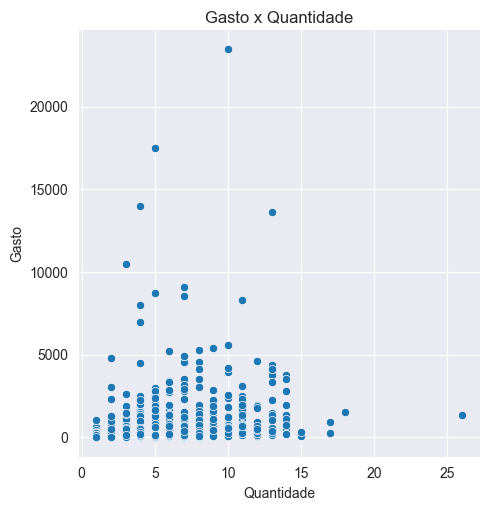

In [108]:
sns.set_style("darkgrid")
sns.relplot(pedidos_total_df, y ="Valor_Venda", x = "Quantidade")
plt.title("Gasto x Quantidade")
plt.ylabel("Gasto")
plt.show()

#Não existe uma relação muito forte, existem produtos baratos que são vendidos em quantidades normais

In [109]:
# 8-Qual é a média de vendas por mês?
print("Dataframe de 2014 a 2017")
print(np.sort(data_df["Data_Pedido"].dt.year.unique()))

Dataframe de 2014 a 2017
[2014 2015 2016 2017]


In [110]:
gasto_mes_df = data_df.groupby([data_df["Data_Pedido"].dt.year, data_df["Data_Pedido"].dt.month])["Valor_Venda"].sum()
gasto_mes_df

Data_Pedido  Data_Pedido
2014         1               14236.8950
             2                4519.8920
             3               55691.0090
             4               28295.3450
             5               23648.2870
             6               34595.1276
             7               33946.3930
             8               27909.4685
             9               81777.3508
             10              31453.3930
             11              78628.7167
             12              69545.6205
2015         1               18174.0756
             2               11951.4110
             3               38726.2520
             4               34195.2085
             5               30131.6865
             6               24797.2920
             7               28765.3250
             8               36898.3322
             9               64595.9180
             10              31404.9235
             11              75972.5635
             12              74919.5212
2016         1 

In [111]:
gasto_mes_df.mean()

47858.35125625

In [112]:
# 9-Quais são os clientes que fizeram pedidos em todas as regiões, seus Ids?
#regiões
print(data_df["Regiao"].unique())
#ajustar a tabela
data_regiao_df = data_df.pivot_table(index = "ID_Cliente",columns= "Regiao", values="ID_Pedido", aggfunc= "count").reset_index()
data_regiao_df

['South' 'West' 'Central' 'East']


Regiao,ID_Cliente,Central,East,South,West
0,AA-10315,6.0,2.0,NaN,3.0
1,AA-10375,2.0,5.0,4.0,4.0
2,AA-10480,10.0,1.0,1.0,NaN
3,AA-10645,3.0,6.0,4.0,5.0
4,AB-10015,3.0,NaN,NaN,3.0
...,...,...,...,...,...
788,XP-21865,11.0,3.0,2.0,12.0
789,YC-21895,3.0,3.0,NaN,2.0
790,YS-21880,NaN,1.0,4.0,7.0
791,ZC-21910,11.0,1.0,3.0,16.0


In [113]:
#selecionar os clientes que comprar em todas regiões excluindo os NaN (not a Number)
clientes_todas_regioes_df = data_regiao_df.dropna()
clientes_todas_regioes_df.reset_index(drop=True)

Regiao,ID_Cliente,Central,East,South,West
0,AA-10375,2.0,5.0,4.0,4.0
1,AA-10645,3.0,6.0,4.0,5.0
2,AB-10060,3.0,7.0,3.0,5.0
3,AB-10105,11.0,1.0,2.0,6.0
4,AB-10165,1.0,3.0,1.0,9.0
...,...,...,...,...,...
296,VM-21835,1.0,3.0,2.0,2.0
297,VP-21760,3.0,7.0,2.0,2.0
298,VW-21775,3.0,7.0,1.0,7.0
299,XP-21865,11.0,3.0,2.0,12.0


In [115]:
# 10-Exiba um gráfico que mostre o valor total gasto em compras por mês, do ultimo ano em especifico.
print("Ultimo ano registrado:")
print(np.sort(data_df["Data_Pedido"].dt.year.unique()).max())

#Separando os pedidos apenas de 2017, criando uma colunas com os meses
data_2017 = data_df.loc[data_df["Data_Pedido"].dt.year == 2017].copy() 
data_2017["Mes_Pedido"] = data_2017["Data_Pedido"].dt.month_name()
data_2017.head()

Ultimo ano registrado:
2017


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Mes_Pedido
12,CA-2017-114412,2017-04-15,AA-10480,Consumer,United States,South,OFF-PA-10002365,Office Supplies,Xerox 1967,15.552,3.0,April
23,US-2017-156909,2017-07-16,SF-20065,Consumer,United States,East,FUR-CH-10002774,Furniture,"Global Deluxe Stacking Chair, Gray",71.372,2.0,July
34,CA-2017-107727,2017-10-19,MA-17560,Home Office,United States,Central,OFF-PA-10000249,Office Supplies,Easy-staple paper,29.472,3.0,October
41,CA-2017-120999,2017-09-10,LC-16930,Corporate,United States,Central,TEC-PH-10004093,Technology,Panasonic Kx-TS550,147.168,4.0,September
43,CA-2017-139619,2017-09-19,ES-14080,Corporate,United States,South,OFF-ST-10003282,Office Supplies,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2.0,September


In [134]:
#Agrupar os valores gastos por mês
meses_2017 = data_2017.groupby("Mes_Pedido")["Valor_Venda"].sum().reset_index()
meses_2017

,Mes_Pedido,Valor_Venda
0,April,36521.5361
1,August,63120.8880
2,December,83829.3188
3,February,20301.1334
4,January,43971.3740
5,July,45264.4160
6,June,52981.7257
7,March,58872.3528
8,May,44261.1102
9,November,118447.8250


In [139]:
#definir ordem
meses_ordem_cronologica = ['January','February','March','April','May','June','July','August', 'September','October','November','December']
#definir como tipo categorico a coluna
meses_2017["Mes_Pedido"] = pd.Categorical(meses_2017["Mes_Pedido"],categories = meses_ordem_cronologica, ordered= True)
#ordenar
meses_ordenados_2017 = meses_2017.sort_values("Mes_Pedido")
meses_ordenados_2017

,Mes_Pedido,Valor_Venda
4,January,43971.3740
3,February,20301.1334
7,March,58872.3528
0,April,36521.5361
8,May,44261.1102
6,June,52981.7257
5,July,45264.4160
1,August,63120.8880
11,September,87866.6520
10,October,77776.9232


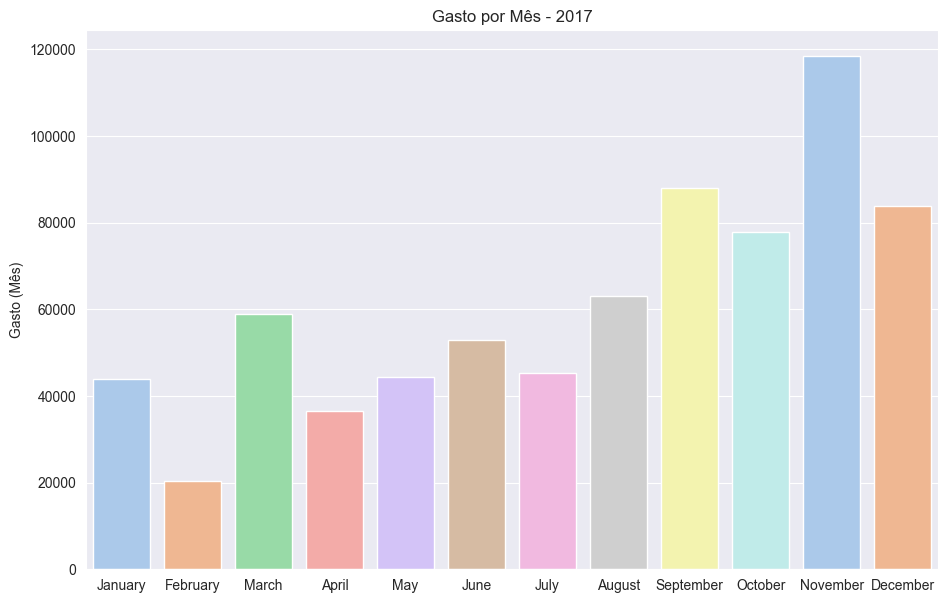

In [157]:
#plotar o gráfico
plt.figure(figsize=(11,7))
sns.barplot(meses_ordenados_2017, x = "Mes_Pedido", y = "Valor_Venda", palette= "pastel")
plt.title("Gasto por Mês - 2017")
plt.ylabel("Gasto (Mês)")
plt.xlabel("")
plt.show()